# Análise de Dados - Ocupação Hospitalar COVID-19

> A avaliação de melhor ou pior hospital não considera a quantidade de paciente por unidade de saúde e também não considera o período de ocupação.

Fonte: https://opendatasus.saude.gov.br

In [1]:
import pandas as pd
import pandera as pa
import matplotlib.pyplot as plt

In [2]:
dataset_covid = "../../datasets/sus2021/esus-vepi.LeitoOcupacao.csv"
dataset_cnes = "../../datasets/sus2021/cnes_ndis_01_04_2020_banco_estab.csv"

sars_df = pd.read_csv(dataset_covid, 
                      low_memory=False, 
                      converters={'cnes': lambda x: str(x)},
                      parse_dates=['dataNotificacao'],
                      date_parser=lambda x: pd.to_datetime(x).tz_localize(None)
                     ).dropna(subset=['cnes', 'saidaConfirmadaObitos'])
cnes_df = pd.read_csv(dataset_cnes, 
                      low_memory=False,
                      usecols=["CO_CNES", "NO_FANTASIA"],
                      converters={'CO_CNES': lambda x: str(x)}
                     ).rename(columns={'CO_CNES': 'cnes', 'NO_FANTASIA': 'nome'})

In [3]:
def cnes(): return cnes_df

In [4]:
cnes().dtypes

cnes    object
nome    object
dtype: object

In [5]:
def df(): return sars_df

In [6]:
df().dtypes

_id                              object
dataNotificacao          datetime64[ns]
cnes                             object
ocupacaoSuspeitoCli             float64
ocupacaoSuspeitoUti             float64
ocupacaoConfirmadoCli           float64
ocupacaoConfirmadoUti           float64
saidaSuspeitaObitos             float64
saidaSuspeitaAltas              float64
saidaConfirmadaObitos           float64
saidaConfirmadaAltas            float64
origem                           object
_p_usuario                       object
estadoNotificacao                object
municipioNotificacao             object
estado                           object
municipio                        object
excluido                           bool
validado                           bool
_created_at                      object
_updated_at                      object
dtype: object

In [7]:
schema = pa.DataFrameSchema(
    columns = {
        "cnes":pa.Column(pa.String),
        "dataNotificacao":pa.Column(pa.DateTime),
        "estado":pa.Column(pa.String, nullable=True),
        "saidaConfirmadaObitos":pa.Column(pa.Float)
        
    }
)

schema.validate(df())

,_id,dataNotificacao,cnes,ocupacaoSuspeitoCli,ocupacaoSuspeitoUti,ocupacaoConfirmadoCli,ocupacaoConfirmadoUti,saidaSuspeitaObitos,saidaSuspeitaAltas,saidaConfirmadaObitos,...,origem,_p_usuario,estadoNotificacao,municipioNotificacao,estado,municipio,excluido,validado,_created_at,_updated_at
0,p5Ez41Zu6B,2020-04-14 03:00:00.000,2303167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,aplicacao-web,_User$auVMjEVEVz,Santa Catarina,Itapema,Santa Catarina,Itapema,True,False,2020-04-15T13:44:30.085Z,2020-04-16T13:56:13.656Z
1,eUOMsSt7T7,2020-04-15 03:00:00.000,5935377\t,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,parse-cloud,_User$WBa5nfe9P9,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,Rio de Janeiro,False,False,2020-04-15T13:50:47.256Z,2020-08-01T20:08:13.116Z
2,QaG4oIBrMa,2020-04-15 14:57:16.255,0012599,15.0,1.0,3.0,2.0,0.0,0.0,0.0,...,parse-cloud,_User$6oxZQHBPQ7,Rio de Janeiro,Niterói,Rio de Janeiro,Niterói,False,False,2020-04-15T15:20:57.033Z,2020-08-01T20:02:12.729Z
3,ifya31F3ZF,2020-03-24 03:00:00.000,2562871,9.0,0.0,1.0,0.0,0.0,0.0,0.0,...,parse-cloud,_User$fhufIbmR9C,Ceará,Várzea Alegre,Ceará,Várzea Alegre,False,False,2020-04-15T16:58:32.839Z,2020-08-01T21:40:37.624Z
4,dkurDhelx9,2020-04-01 03:00:00.000,2252228,26.0,0.0,1.0,0.0,0.0,0.0,0.0,...,parse-cloud,_User$tkAdHTNhC9,Rio Grande do Sul,Encantado,Rio Grande do Sul,Encantado,False,False,2020-04-15T17:02:53.877Z,2020-08-01T21:37:53.664Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085393,MKQJ10vpwx,2021-08-30 03:00:58.468,2298317,31.0,17.0,0.0,10.0,0.0,0.0,0.0,...,parse-cloud,_User$E1nsZgFQ3O,Rio de Janeiro,Campos dos Goytacazes,Rio de Janeiro,Campos dos Goytacazes,False,False,2021-08-30T23:50:05.115Z,2021-08-30T23:50:05.115Z
1085394,6wZ7fGaeNN,2021-08-30 03:00:09.541,2006448,43.0,7.0,0.0,0.0,0.0,0.0,0.0,...,parse-cloud,_User$3sZIQDvonm,Alagoas,Maceió,Alagoas,Maceió,False,False,2021-08-30T23:51:42.356Z,2021-08-30T23:51:42.356Z
1085395,1eLGSC8Jbc,2021-08-28 03:00:00.000,6518893,41.0,26.0,1.0,1.0,0.0,0.0,0.0,...,parse-cloud,_User$X0sO8dgFRM,Rio de Janeiro,São João de Meriti,Rio de Janeiro,São João de Meriti,False,False,2021-08-31T00:30:14.110Z,2021-08-31T00:30:49.613Z
1085396,Uu2RgeGCTH,2021-08-29 03:00:00.000,6518893,36.0,28.0,0.0,1.0,0.0,1.0,0.0,...,parse-cloud,_User$X0sO8dgFRM,Rio de Janeiro,São João de Meriti,Rio de Janeiro,São João de Meriti,False,False,2021-08-31T00:31:24.378Z,2021-08-31T00:31:24.378Z


In [19]:
def get_hospital_by_cnes(id):
    while len(id) < 7: id = "0" + id
    return cnes().loc[cnes().cnes == id].nome.iloc[0]

In [9]:
def history_by_cnes(id):
    while len(id) < 7: id = "0" + id
    filter = df().cnes == id
    rows = df().loc[filter, ["dataNotificacao", "saidaConfirmadaObitos"]]
    grouped = rows.groupby(['dataNotificacao'])
    rank = grouped.saidaConfirmadaObitos.sum().sort_values()
    return rank

In [10]:
def best_hospital_by_state(state):
    filter = df().estado.str.lower() == state.lower()
    rows = df().loc[filter, ["cnes", "saidaConfirmadaObitos"]]
    grouped = rows.groupby(['cnes'], as_index = False)
    rank = grouped.saidaConfirmadaObitos.mean().sort_values(by="saidaConfirmadaObitos")
    return  rank[rank.saidaConfirmadaObitos > 0].iloc[0].cnes

In [11]:
def worst_hospital_by_state(state):
    filter = df().estado.str.lower() == state.lower()
    rows = df().loc[filter, ["cnes", "saidaConfirmadaObitos"]]
    grouped = rows.groupby(['cnes'], as_index = False)
    result = grouped.saidaConfirmadaObitos.mean().sort_values(by="saidaConfirmadaObitos", ascending=False)
    return  result.iloc[0].cnes

In [12]:
# Melhor Hospital de Ceará: Menor média de mortalidade por COVID19

cnes_rank = best_hospital_by_state("ceará")
get_hospital_by_cnes(cnes_rank)

# 2481286 	MATERNIDADE ESCOLA ASSIS CHATEAUBRIAND

48735    MATERNIDADE ESCOLA ASSIS CHATEAUBRIAND
Name: nome, dtype: object

In [13]:
# Melhor Hospital de São Paulo: Menor média de mortalidade por COVID19

cnes_rank = best_hospital_by_state("são paulo")
get_hospital_by_cnes(cnes_rank)

# 2079690 	SANTA CASA DE MISERICORDIA DE SAO LUIZ DO PARA..

16085    SANTA CASA DE MISERICORDIA DE SAO LUIZ DO PARA...
Name: nome, dtype: object

In [14]:
# Pior Hospital do Ceará: Maior média de mortalidade por COVID19

cnes_rank = worst_hospital_by_state("ceará")
get_hospital_by_cnes(cnes_rank)

# 0086673 	HOSPITAL LEONARDO DA VINCI

7165    HOSPITAL LEONARDO DA VINCI
Name: nome, dtype: object

In [15]:
# Pior Hospital de São Paulo: Maior média de mortalidade por COVID19

cnes_rank = worst_hospital_by_state("São paulo")
get_hospital_by_cnes(cnes_rank)

# 2091585 	HOSPITAL ESTADUAL DE SAPOPEMBA SAO PAULO

16979    HOSPITAL ESTADUAL DE SAPOPEMBA SAO PAULO
Name: nome, dtype: object

<AxesSubplot:xlabel='dataNotificacao'>

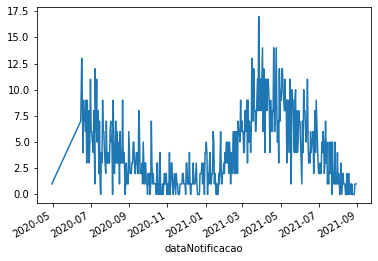

In [33]:
best_ce = worst_hospital_by_state("ceará")
hist_ce = history_by_cnes(best_ce)
hist_ce.plot()

<AxesSubplot:xlabel='dataNotificacao'>

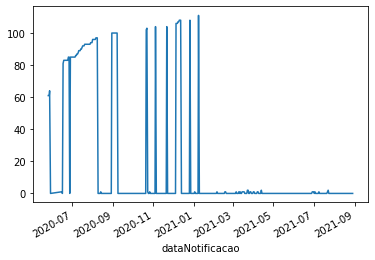

In [34]:
best_sp = worst_hospital_by_state("são paulo")
hist_sp = history_by_cnes(best_sp)
hist_sp.plot()

<AxesSubplot:xlabel='dataNotificacao'>

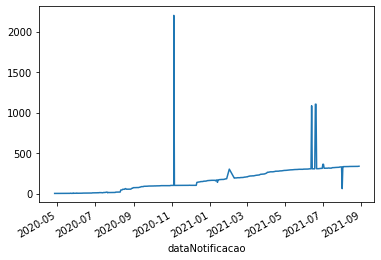

In [37]:
best_sc = worst_hospital_by_state("santa catarina")
hist_sc = history_by_cnes(best_sc)
hist_sc.plot()
